# Prosper Loan Analysis
## by Likhith J Gunjal

## Investigation Overview

> We would like to explore relationship between variables in the prosper loan dataset and gain insight into factors that affect the borrower interest rates and the cause for loan defaulting.

## Dataset Overview

> The Propser loan dataset is a dataset of loans borrowed by people across the US. It contains many features (81) which include, interest rates, loan status, the borrower geographic state, etc. it consists of 113937 records. We try to explore this dataset with visualization using matplotlib and seaborn packages.The Propser loan dataset is a dataset of loans borrowed by people across the US. It contains many features (81) which include, interest rates, loan status, the borrower geographic state, etc. it consists of 113937 records. We try to explore this dataset with visualization using matplotlib and seaborn packages.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
df=pd.read_csv('prosperLoanData.csv')
df.head()
df.shape
df1=df.iloc[:,np.r_[1:9,15:22,34,41,42,46:50,63,64,67,35,36,25,26]] #choosing columns/features for our analysis
print('Rows, Columns  :',df1.shape) #Finding the number of columns and rows in our chosen subset of data

nulls=[]

#creating list of number of null values in each column in the dataset
for col in df1.columns:
    nulls.append(df1[col].isna().sum())#


Rows, Columns  : (113937, 29)


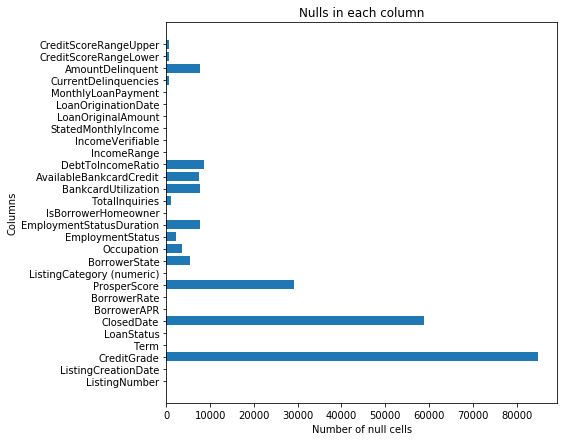

In [16]:
plt.figure(figsize=(7,7))
plt.barh(df1.columns,nulls);
plt.xlabel('Number of null cells');
plt.ylabel('Columns');
plt.title('Nulls in each column');

## Interest rate distribution

> As we explore what affects the Borrower's  Interest rate, let us begin with a simple distribution explorations of how the Interest rate varies in terms of frequency. This ditribution tells us that the highest frequency is with interests rates between 10%-20%. The maximmum and minimum of the range varies between 5 and 40%


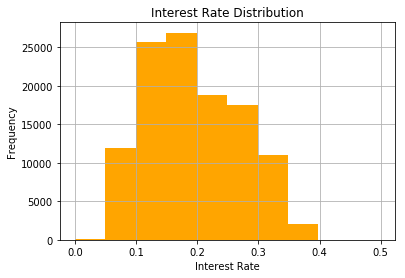

In [15]:
#Interest rate distribution
plt.figure(1)
df1['BorrowerRate'].hist(color='orange');
plt.xlabel('Interest Rate');
plt.ylabel('Frequency');
plt.title('Interest Rate Distribution');

## Upper Credit Score vs Borrower rate

> The heatmap shows that most people lie in the range of 600-700 and have an interest rate of 15%.  However we see that Borrower rate is not affected by Credit score alone, as there are many others in the heatmap with interest rates ranging from 20%-30% and still in the same credit score range of 600-700. We have to further analyze the relationship between interest rate and other features.

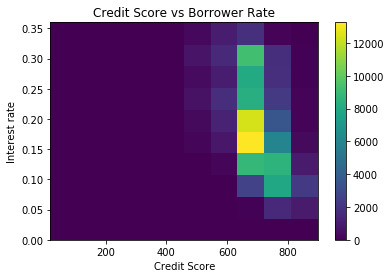

In [14]:
plt.figure(1)
crs1=df1.loc[df1['CreditScoreRangeUpper'].notnull()] # creating dataset of non-blank credit score upper range values

plt.hist2d(data=crs1,x=crs1['CreditScoreRangeUpper'],y=crs1['BorrowerRate']) #plotting histogram of credit score vs Borrower Rate
plt.colorbar()
plt.title('Credit Score vs Borrower Rate');
plt.xlabel('Credit Score');
plt.ylabel('Interest rate');

## Borrower Rate in Defaults vs Non Defaults for different Employment Status
 > The below facetgrid shows how Interest rates and employment status vary among defaulters and non defaulters.
 
 > We can see the general trend that median borrower rates are higher for defaults than non defaults across categories. But the amount by which the rate differs between defaults and non defaults among categories varies. For example we can see that among self employed people, the median interest rates are not too different from each other whereas among employed, the difference is pronounced. Another general trend here is that the whisker length in Defaults is lower than whisker length in Non Defaults.


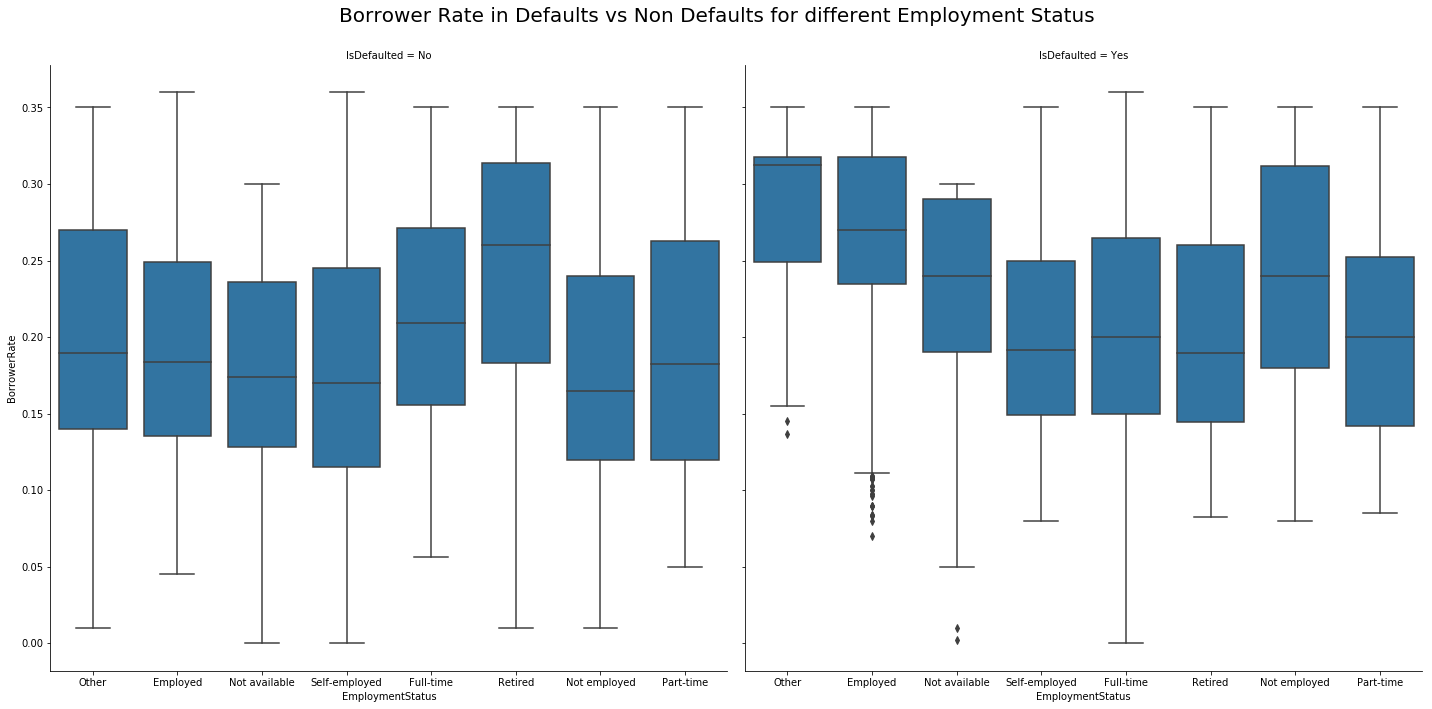

In [17]:
# creating new binary indicator variable for defaulters and no defaulters
isdefaulted=[]
for status in df1['LoanStatus']:
    if status=='Defaulted':
        isdefaulted.append('Yes')
    else :
        isdefaulted.append('No')

df1['IsDefaulted']=isdefaulted #inserting the indicator column into Dataframe
      
g = sns.FacetGrid(data = df1, col = 'IsDefaulted', size = 10);
g.map(sns.boxplot, 'EmploymentStatus', 'BorrowerRate');    
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Borrower Rate in Defaults vs Non Defaults for different Employment Status',size=20);

## Prosper Score in Defaults vs Non Defaults for different Employment Status

> We explore the interaction betweem Prosper Score employment status and defaulters.

>> We can determine the effectiveness of the prosper score (which represents risk factor) in predicting the possibility of defaulting among different work status. If we assume that the difference in median Prosperscore between defaults and non defaults in their respective employment categories as the goodness of prediction, then the predictive abilities of the prosper score among 'other' employment status constituents is bad because this difference is almost zero. Vice versa, in the case of part time employees, the difference in prosper score between defaulters and non defaulters is quite high, hence the predictive ability of prosperscore in this category is quite good. Similar comparisions can be done on all categories of employees.
Insights


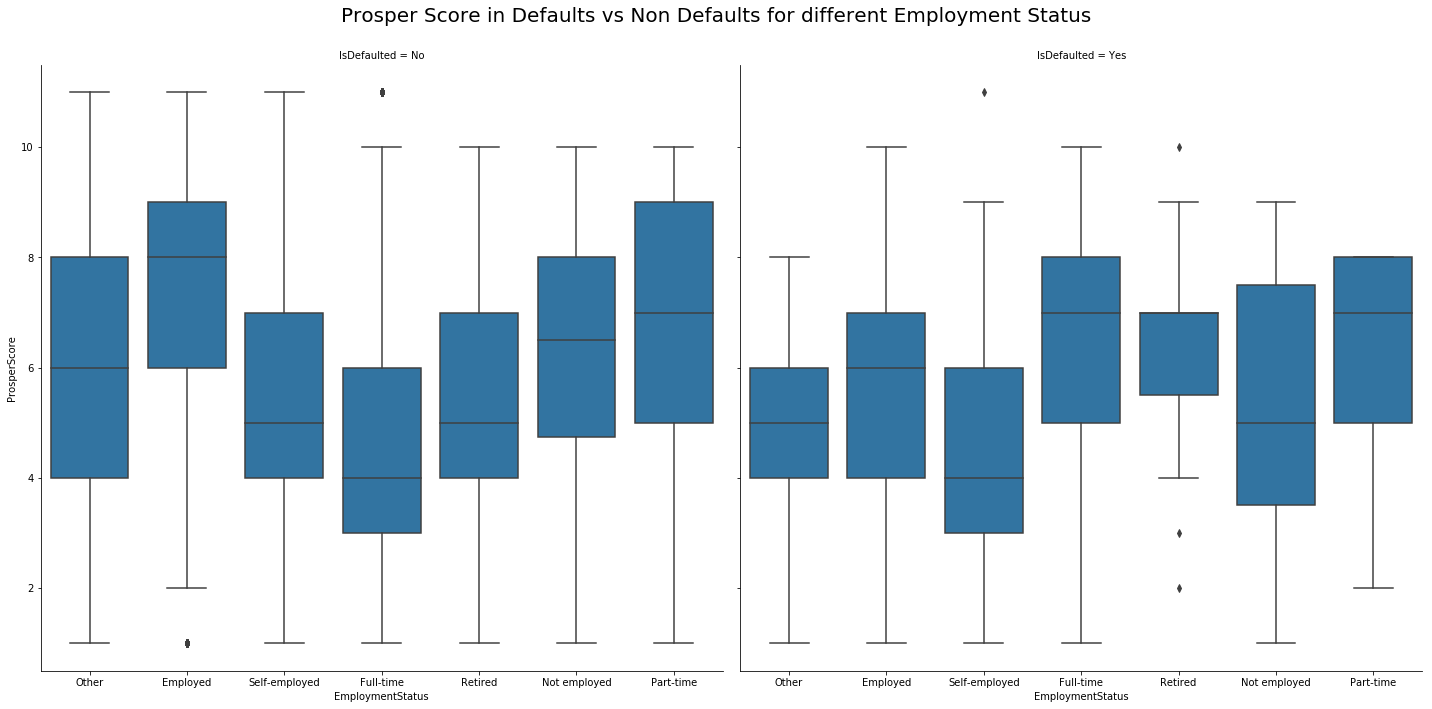

In [18]:
g = sns.FacetGrid(data = df1, col = 'IsDefaulted', size = 10)
g.map(sns.boxplot, 'EmploymentStatus', 'ProsperScore');
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Prosper Score in Defaults vs Non Defaults for different Employment Status',size=20);

In [1]:
! jupyter nbconvert explanatory_analysis.ipynb --to slides --post serve --template output_toggle


[NbConvertApp] Converting notebook explanatory_analysis.ipynb to slides
[NbConvertApp] Writing 431557 bytes to explanatory_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Dell\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\Dell\Anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 338, in start
    self.convert_notebooks()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 508, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C: